In [6]:
import sdm as sdmlib
import matplotlib.pyplot as plt

In [20]:
def run(n, H, r, d, steps=100):
    """
    n = bits
    H = number of hardlocations
    r = radius
    d = distance between bitstrings
    """
    as1 = sdmlib.AddressSpace.init_random(n, H)
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = as1.scan_thread2(bs1, r)
        selected2 = as1.scan_thread2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    return v

In [21]:
v = run(1000, 1000000, 451, 0)

In [22]:
mu = 1.0*sum(v)/len(v)
var = sum((x-mu)**2 for x in v)/len(v)
print('mu', mu)
print('var', var)

('mu', 1070.25)
('var', 1065.5475)


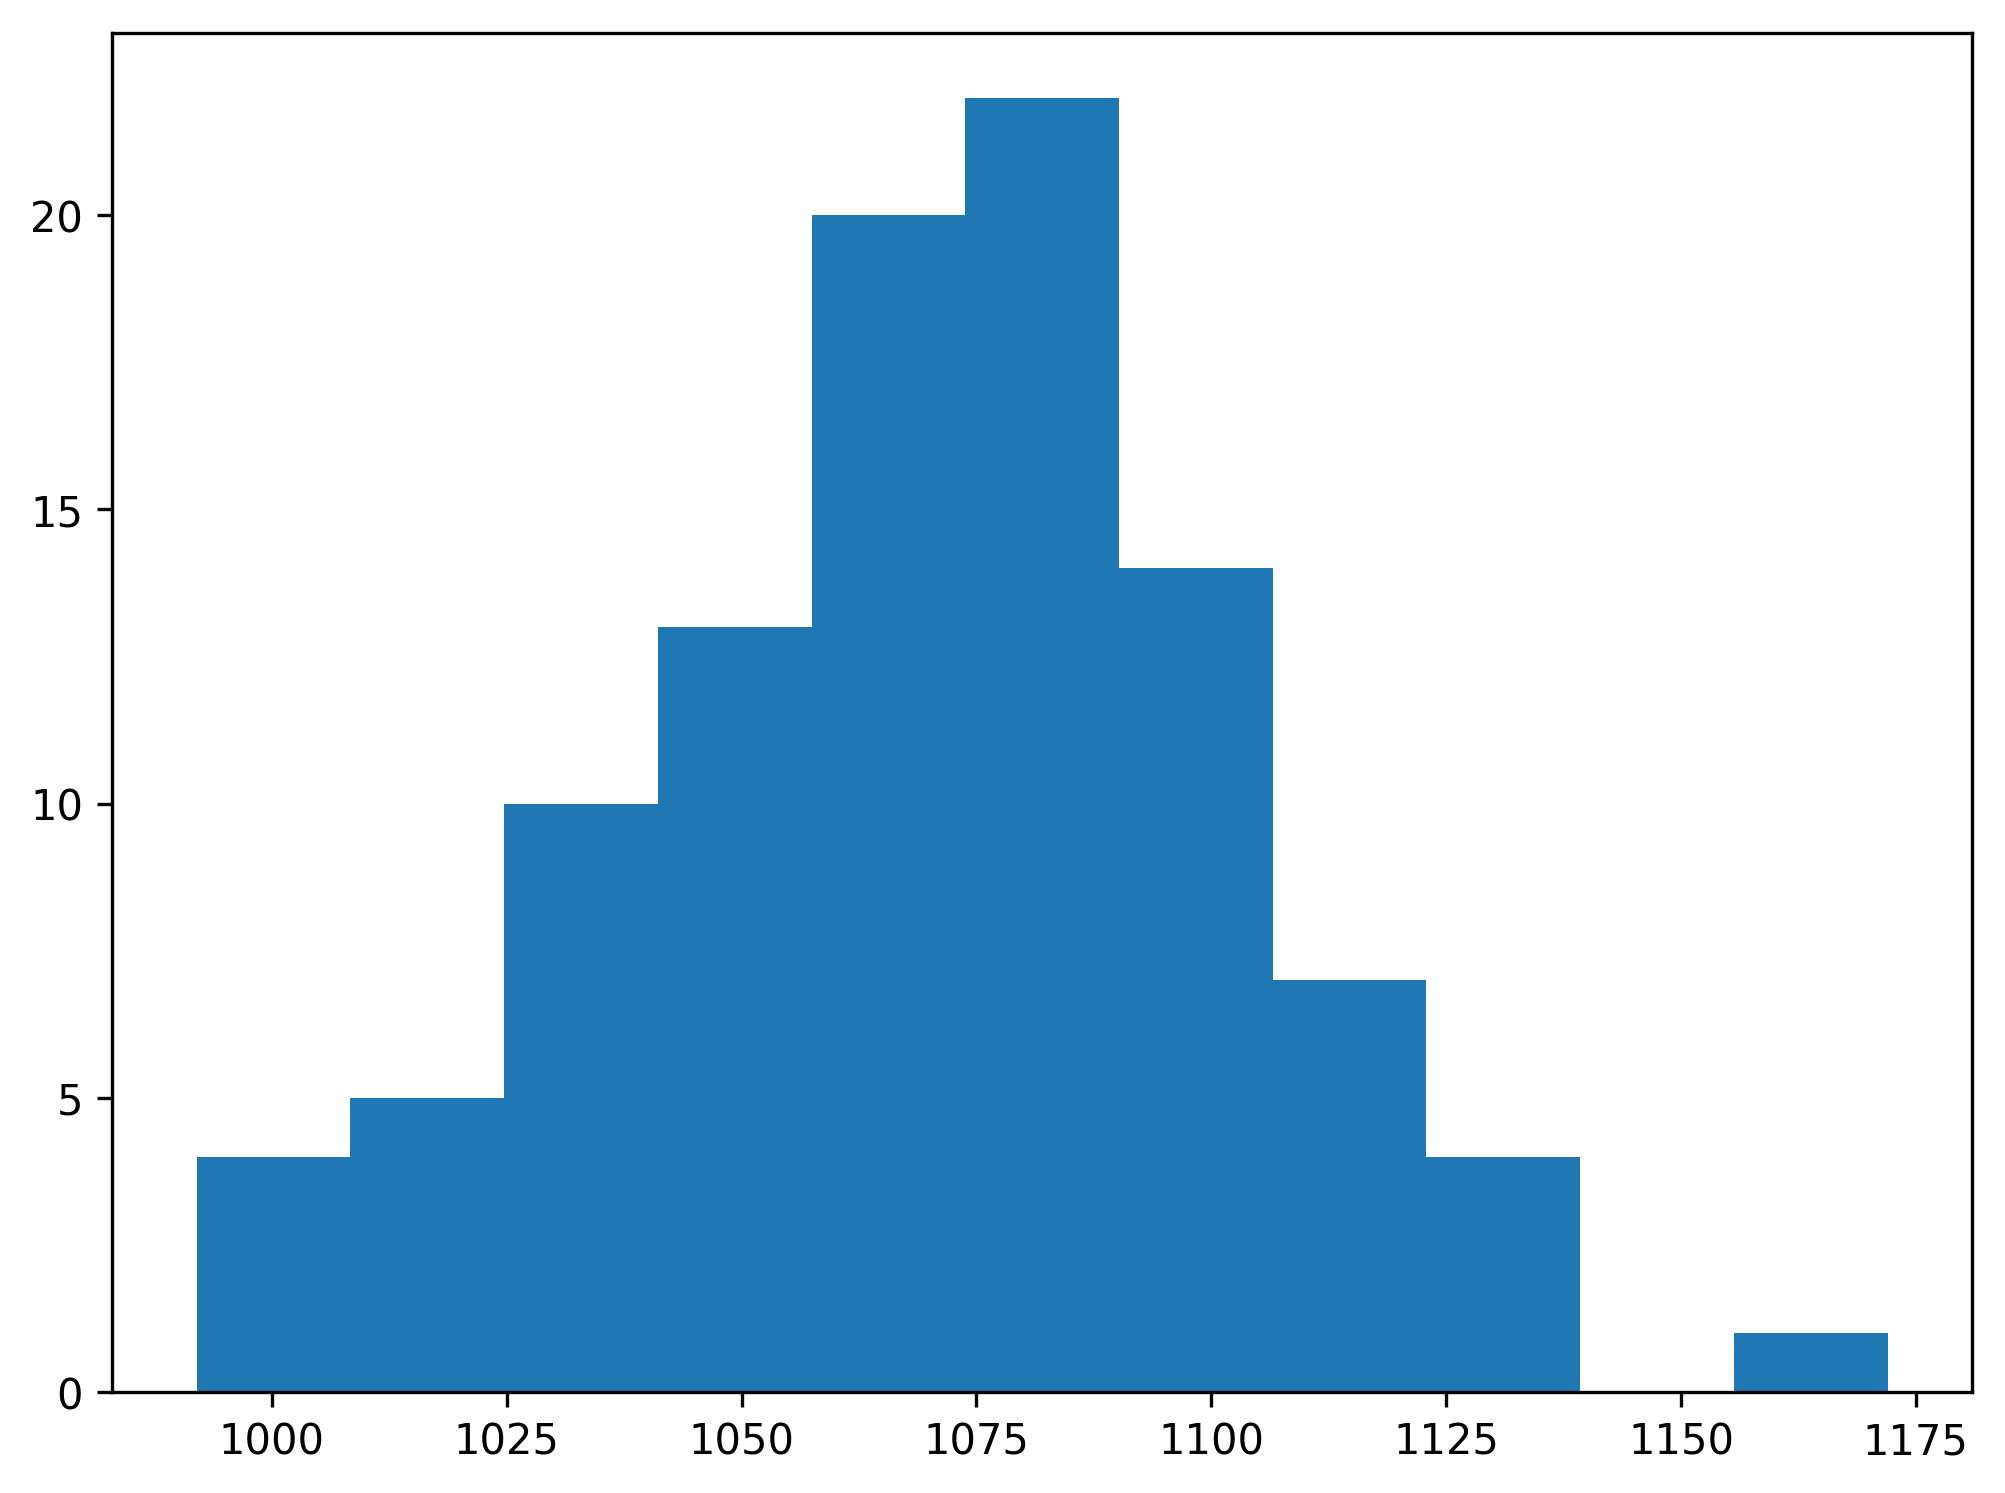

In [23]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd');